# **1. Overview**
Tanzania, a developing nation, faces challenges in supplying its more than 57,000,000 inhabitants with water that is safe for drinking. It is extremely difficult for people to find clean, sanitary water if they do not reside close to one of the three large lakes that border the country, as one-third of the country is arid to semi-arid. Consequently, Tanzanians rely heavily on groundwater as their primary supply of water;


According to the Sustainable Development Goals (SDG) standards, just 61% of Tanzanian households presently have access to a basic water supply, 32% to basic sanitation, and 48% to basic hygiene. As a direct result, Tanzania has had to deal with mortality and illness, with the poor and vulnerable, women, and children bearing the brunt of this burden. Inadequate WASH services are thought to be the cause of 31,000 fatalities annually in Tanzania, accounting for almost 10% of avoidable deaths. These deaths also cost the country more than $2.4 billion annually in lost productivity and additional medical expenses.

The nation already has a large number of water points (stations), but some of them require maintenance, while others have completely failed.

The project aims to builds classification model, using an iterative approach, to predict the condition of water wells in Tanzania. The dataset for modelling was obtained from data provided by Taarifa and the Tanzanian Ministry of water. 

# **2. Business and Data Understanding**
## **2.1 Business Problem**
Victoria Inc. has been procured by the Government of Tanzania on a consultancy basis to study the severe water crisis experienced by the country and propose a data driven solution to clean water accessibility. Victoria Inc. is tasked with coming up with a  model that predicts the operating condition of the water points. This model will assist the government to:
- Prioritize maintenance and repairs based on operating status;
- Understand the failure rate of the water points;
- Optimize allocation of resources to restore the water points.  

The objective of Victoria Inc is to:
- Develop a predictive model for classifying water points;
- Identify factors that affect water points functionality; 

Proposed Solution:
- Develop a machine learning classification model with a recall score of 90%.

Performance Metrics:
- Acurracy
- Precision
- Recall
- F1-score

## **2.2 Data Understanding**
###  **2.2.1 Data Source**
The dataset employed in the study was downloaded from https://www.drivendata.org/competitions/7/data/

### **2.2.2 Dataset Features**
The following features about the water points are provided:
- *amount_tsh* - Total static head (amount water available to waterpoint)
- *date_recorded* - The date the row was entered
- *funder* - Who funded the well
- *gps_height* - Altitude of the well
- *installer* - Organization that installed the well
- *longitude* - GPS coordinate
- *latitude* - GPS coordinate
- *wpt_name* - Name of the waterpoint if there is one
- *num_private* -
- *basin* - Geographic water basin
- *subvillage* - Geographic location
- *region* - Geographic location
- *region_code *- Geographic location (coded)
- *district_code* - Geographic location (coded)
- *lga* - Geographic location
- *ward* - Geographic location
- *population* - Population around the well
- *public_meeting* - True/False
- *recorded_by *- Group entering this row of data
- *scheme_management* - Who operates the waterpoint
- *scheme_name* - Who operates the waterpoint
- *permit* - If the waterpoint is permitted
- *construction_year* - Year the waterpoint was constructed
- *extraction_type* - The kind of extraction the waterpoint uses
- *extraction_type_group* - The kind of extraction the waterpoint uses
- *extraction_type_class* - The kind of extraction the waterpoint uses
- *management* - How the waterpoint is managed
- *management_group* - How the waterpoint is managed
- *payment* - What the water costs
- *payment_type* - What the water costs
- *water_quality* - The quality of the water
- *quality_group* - The quality of the water
- *quantity* - The quantity of water
- *quantity_group* - The quantity of water
- *source* - The source of the water
- *source_type* - The source of the water
- *source_class* - The source of the water
- *waterpoint_type* - The kind of waterpoint
- *waterpoint_type_group* - The kind of waterpoint

The target variable has three possible values:
- **functional** - the waterpoint is operational and there are no repairs needed
- **functional needs repair** - the waterpoint is operational, but needs repairs
- **non functional** - the waterpoint is not operational

## **2.3 Methodology**
The adopted structure for the project was CRISP-DM that entails undertaking Business Understanding; Data Understanding; Data Preparation; Data Cleaning and Explatory Data Analysis(EDA); Modelling; Conclusion and Recommendations.

# **3.Data Cleaning and EDA**
## **3.1 Data Cleaning & Preparation**
Importing packages

In [109]:
#importing standard packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [110]:
# loading the training data set
data_train_set = pd.read_csv("data/training_set_values.csv", index_col="id")
data_train_set

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [111]:
# importing the test data set
data_test_set = pd.read_csv("data/test_set_values.csv", index_col="id")
data_test_set

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe


In [112]:
# importing the training set labels
data_train_labels = pd.read_csv("data/training_set_labels.csv", index_col="id")
data_train_labels

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [113]:
#merging the training dataset with the train labels
data = pd.merge(data_train_labels, data_train_set, on="id", how="inner")
data

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [114]:
# creating new index for the merged dataset
data.reset_index(inplace=True)
data

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [115]:
# checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

The data set is made up of 41 columns and 59,400 rows. The data frame features has 3 float datatype; 7 integer datatype and 31 object datatype.

In [116]:
#checking for duplicates
data.duplicated().sum()

0

The data set had zero duplicates

In [117]:
# checking null values
data.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

The columns "funder", "installer", "subvillage", "public_meeting", "scheme_management", "scheme_name", and "permit" had 3635, 3655, 371, 3334, 3877, 28166 and 3056 missing (null) values respectively. Scheme_name has the highest number of missing values.

In [118]:
for col in data.columns:
    print(data[col].value_counts())

69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: id, Length: 59400, dtype: int64
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rarymond Ekura               1
Justin

The following columns contain either similar or duplicated data, therefore, in order to avoid multicollinearity one or both of the columns will be dropped:
- *scheme_management *and *management*;
- *extraction_type*, *extraction_type_group* and *extraction_type_class*;
- *payment* and *payment_type*;
- *water_quality* and *quality_group*
- *quantity* and *quantity_group*
- *source* and *source_type*
- *waterpoint_type* and *waterpoint_type_group*

Similarly, the following columns will either be transformed or dropped: 
- columns to be dropped: 
    - *id* as its just an index identifier, *num_private* since its not defined and therefore its relevance is not clear; *recorded_by* since it has the same value throughout the dataset; 
    - *population*, *amount_tsh*, *construction_year*, *longitude*, *latitude*, and *gps_height* have 0 entered on most of their rows. The rows with 0 will be dropped.
- columns to be transformed or feature engineered:
    - *permit* and *public_meeting* are boolean;
    - *wpt_name*, *scheme_name*, *subvillage*, *ward*, *date_recorded*, *funder* are categorical variables with their unique values in integers. Therefore, they will require further analysis and probable use of dummy variables.

In [119]:
# columns to be dropped
drop_cols = ["scheme_management", "extraction_type", "extraction_type_group", 
             "payment", "water_quality", "source_type", "waterpoint_type_group", 
             "id", "num_private", "recorded_by", "quantity", "public_meeting", 
             "wpt_name", "scheme_name", "subvillage", "ward", "date_recorded", 
             "funder", "district_code", "lga", "region_code", "ward", "management_group", 
             "longitude", "latitude", "gps_height", "source"]

#dropping the columns:
data = data.drop(drop_cols, axis=1)

# checking the information of the new dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   installer              55745 non-null  object 
 3   basin                  59400 non-null  object 
 4   region                 59400 non-null  object 
 5   population             59400 non-null  int64  
 6   permit                 56344 non-null  object 
 7   construction_year      59400 non-null  int64  
 8   extraction_type_class  59400 non-null  object 
 9   management             59400 non-null  object 
 10  payment_type           59400 non-null  object 
 11  quality_group          59400 non-null  object 
 12  quantity_group         59400 non-null  object 
 13  source_class           59400 non-null  object 
 14  waterpoint_type        59400 non-null  object 
dtypes:

The new dataframe has 15 columns and 59400 rows. Its only columns "installer" and "permit" that have missing values. The dataframe is made up of three datatypes: 1 column of type float, 2 columns with type integer and 12 columns with type object.

In [120]:
# dropping the null values
data = data.dropna()

# confirming no null values are remaining
data.isna().sum()

status_group             0
amount_tsh               0
installer                0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment_type             0
quality_group            0
quantity_group           0
source_class             0
waterpoint_type          0
dtype: int64

In [121]:
# converting permit column to integers
data["permit"] = data["permit"].astype(int)

# checking datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55102 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55102 non-null  object 
 1   amount_tsh             55102 non-null  float64
 2   installer              55102 non-null  object 
 3   basin                  55102 non-null  object 
 4   region                 55102 non-null  object 
 5   population             55102 non-null  int64  
 6   permit                 55102 non-null  int32  
 7   construction_year      55102 non-null  int64  
 8   extraction_type_class  55102 non-null  object 
 9   management             55102 non-null  object 
 10  payment_type           55102 non-null  object 
 11  quality_group          55102 non-null  object 
 12  quantity_group         55102 non-null  object 
 13  source_class           55102 non-null  object 
 14  waterpoint_type        55102 non-null  object 
dtypes:

The dataframe shape has been reduced to 15 columns by 55102 rows.

In [122]:
# checking unique values after initial data cleaning
data.nunique()

status_group                3
amount_tsh                 95
installer                2056
basin                       9
region                     21
population               1026
permit                      2
construction_year          55
extraction_type_class       7
management                 12
payment_type                7
quality_group               6
quantity_group              5
source_class                3
waterpoint_type             7
dtype: int64

Categorical variable "installer", requires further investigation since it still has 2056 unique variables which would overwhelm the model. Population is an integer and therefore having different unique values is not problematic.

In [123]:
# viewing the installer column data values
print(data["installer"].unique().tolist())


['Roman', 'GRUMETI', 'World vision', 'UNICEF', 'Artisan', 'DWE', 'DWSP', 'Water Aid', 'Private', 'DANIDA', 'Lawatefuka water sup', 'WEDECO', 'Danid', 'TWE', 'ISF', 'Kilolo Star', 'District council', 'Water', 'WU', 'Not known', 'Central government', 'CEFA', 'Commu', 'Accra', 'World Vision', 'LGA', 'MUWSA', 'KKKT _ Konde and DWE', 'Government', 'Olgilai village community', 'KKKT', 'RWE', 'Adra /Community', 'SEMA', 'SHIPO', 'HESAWA', 'ACRA', 'Community', 'IFAD', 'Sengerema Water Department', 'HE', 'ISF and TACARE', 'Kokeni', 'DA', 'Adra', 'ALLYS', 'AICT', 'KIUMA', 'CES', 'District Counci', 'Ruthe', 'Adra/Community', 'Tulawaka Gold Mine', 'KKT C', 'Water board', 'LOCAL CONTRACT', 'LIPS', 'TASAF', 'World', '0', 'SW', 'Shipo', 'Fini water', 'Kanisa', 'OXFARM', 'VILLAGE COUNCIL Orpha', 'Villagers', 'Idara ya maji', 'FPCT', 'WVT', 'Ir', 'DANID', 'Angli', 'secondary school', 'Amref', 'JBG', 'DADIS', 'International Aid Services', 'RW', 'Dmdd', 'TCRS', 'RC Church', 'WATER AID', 'JICA', 'Gwasco L'

In [124]:
#exporting installer column details to a file
data['installer'].to_csv('data/column_details.csv', index=False)


In [125]:
# correcting typos on the installer column

data["installer"] = data["installer"].replace(to_replace=(
    'World vision', 'World Vision', 'world vision', 'World Visiin', 'World Division', 
    'WORLD VISION'), value="World Vision")

data["installer"] = data["installer"].replace(to_replace=(
    'Central government', 'Government', 'Central Government','GOVERNMENT', 'Tanzania Government', 
    'CENTRAL GOVERNMENT', 'Government /Community', 'Concern /government', 'central government',
    'Cental Government','Cebtral Government', 'TANZANIAN GOVERNMENT', 'Tanzanian Government',
    'Government and Community', 'Cetral government /RC', 'Tanzania government', 'Centra Government',
    'GOVERNME', 'GOVER', 'Gover','Central govt', 'Gove', 'GOVERM', 'GOVERN',
    'Centra govt', 'Cetral government', 'Governmen', 'TZ as', 'Jumuiya', 'Jumuhia', ), 
                                              value="Central Government")

data["installer"] = data["installer"].replace(to_replace=(
    'World Bank', 'World banks', 'WORLD BANK', 'World bank','WOULD BANK', 'Word Bank',
    'world banks', 'WORDL BANK', 'Word bank', ), 
                                              value="World Bank")

data["installer"] = data["installer"].replace(to_replace=('UNICRF', 'Unicef', 'Unisef'), 
                                              value="UNICEF")

data["installer"] = data["installer"].replace(to_replace=(
    'JICA', 'JIKA', 'Jika', 'Jica', 'Jiks', 'JAICA','Jaica', 'JAICA CO', 'Jeica', 'GAICA'), 
                                              value="JICA")

data["installer"] = data["installer"].replace(to_replace=(
    'Olgilai village community', 'VILLAGE COUNCIL Orpha', 'Villagers', 'Villa', 
    'Villages', 'Vill', 'Village', 'VILLAGE COUNCIL', 'Villi', 'Village Council', 
    'Village Counil', 'Sekei village community', 'Village govt', 'Village community', 
    'Villaers', 'Village Govt', 'ViLLAGE COUNCIL', 'villagers', 'Village Government', 
     'villigers', 'VILLAGE COUNCIL .ODA','VILLAG', 'Villag', 'Villege Council', 
     'Villagerd','VILLAGERS', 'Nduku village','Subvillage', 'Kitiangare village community', 
     'Village Technician', 'Oldadai village community', 'VILLAGE WATER COMMISSION', 
     'villager','Village Office', 'Village community members', 'Nyamingu subvillage',
     'Village water committee', 'Village water attendant', 'Village local contractor'), 
                                              value="VILLAGE")

data["installer"] = data["installer"].replace(to_replace="0", value="Unknown")

data["installer"] = data["installer"].replace(to_replace=(
    'Adra/ Community',  'Arab community', 'Taboma/Community','Communit', 'Killflora /Community',
    'RWE/ Community', 'Olgilai village community', 'Commu', 'Sekei village community', 'COMMU',
    'COMMUNITY', 'Ilwilo community', 'Igolola community', 'Comunity', 'Marumbo Community', 
    'Maseka community','Islamic community', 'District Community j' ), 
                                              value="COMMUNITY")

data["installer"] = data["installer"].replace(to_replace=(
    'Fini water', 'FinW', 'FIN WATER','FINN WATER', 'FINI WATER', 'FinWater', 
    'FiNI WATER', 'FINI Water', 'Fin water', 'FinWate', ), 
                                              value="FINI WATER")

data["installer"] = data["installer"].replace(to_replace=(
    'District council','District Counci' 'District Council','District water department', 
    'Distri', 'District Water Department', 'District water depar', 'District COUNCIL',
    'DISTRICT COUNCIL', 'MBULU DISTRICT COUNCIL', 'Sangea District Coun', 
    'Songea District Coun', 'Mbozi District Council'), 
                                              value="DISTRICT COUNCIL")

data["installer"] = data["installer"].replace(to_replace=(
    'RC Church', 'RC CHURCH','RC Churc', 'RCchurch/CEFA', 'Chur',
    'RC church/Central Gover', 'KKKT CHURCH', 'Pentecost church', 'Roman Church', 
    'RC church/CEFA', 'lutheran church', 'Free Pentecoste Church of Tanz', 'RC C', 
    'Church', 'Morovian church', 'CEFA/rc church', 'Anglican Church', 'Church Of Disciples', 
    'ANGLIKANA CHURCH', 'ANGRIKANA', 'church', 'Anglican church', 'kanisa', 
    'Lutheran Church', 'Pentecostal church','Jeshi la wokovu [cida]', 'METHODIST CHURCH',
    'CHURCH', 'morovian church', 'Angrikana', 'HAIDOMU LUTHERAN CHURCH','RC CHURCH BROTHER', 
    'St Magreth Church', 'Pentecosta','rc church', 'Anglica Church', 'RC Mi', 
    'BAPTIST CHURCH OF TANZANIA', 'FPCT Church', 'RC .Church','BATIST CHURCH', 'CHURC', 
    'DWE/Anglican church', 'RC Churc','RCchurch/CEFA', 'RC', 'RC Ch','HW/RC' 'RC CH',
    'rc ch','RC CATHORIC', 'RC mission',  'Church Of Disciples', 'CG/RC', 'RC MISSIONARY', 'RC Msufi', 
    'Rc Mis','Jeshi la Wokovu'), 
                                              value="CHURCH")

data["installer"] = data["installer"].replace(to_replace=(
    'DANIDA', 'Danid', 'DANID', 'DANIDA CO','DANIAD', 'DANIDS' ), 
                                              value="DANIDA")

data["installer"] = data["installer"].replace(to_replace=(
    'HESAWA', 'Hesawa', 'HESAWS',  'hesawa', 'HESAW', 'HESAWZ', 'HESAWQ', 'Hesawz', 'HesaWa',   ), 
                                              value="HESAWA")

data["installer"] = data["installer"].replace(to_replace=(
    'KKKT _ Konde and DWE','KKKT','KKKT-Dioces ya Pare', 'KkKT', 'KKKT Leguruki', 
    'KKKT Ndrumangeni','KKKT DME', 'KKKT Kilinga', 'KKKT Canal', 'KKKT Katiti juu', 
    'KKKT MAREU', 'Kkkt'), 
                                              value="KKKT")
# viewing the top 30 installer values after initial cleaning
data["installer"].value_counts().head(30)

DWE                   17361
Central Government     3587
DANIDA                 1676
HESAWA                 1225
RWE                    1203
COMMUNITY              1162
KKKT                   1091
DISTRICT COUNCIL        817
Unknown                 780
TCRS                    702
World Vision            671
CHURCH                  647
CES                     610
FINI WATER              572
Community               552
District Council        546
VILLAGE                 514
JICA                    427
LGA                     408
WEDECO                  397
TASAF                   390
UNICEF                  333
TWESA                   316
AMREF                   313
WU                      301
Dmdd                    286
ACRA                    277
SEMA                    249
DW                      246
OXFAM                   234
Name: installer, dtype: int64

In [126]:
# converting all the categories to "OTHERS" and keeping only the top 30 categories for installer column
top_30_installer = data["installer"].value_counts(normalize=True).nlargest(30).index

data["installer"]= [x if x in top_30_installer else "OTHERS" for x in data["installer"]]
data["installer"].value_counts()

DWE                   17361
OTHERS                17209
Central Government     3587
DANIDA                 1676
HESAWA                 1225
RWE                    1203
COMMUNITY              1162
KKKT                   1091
DISTRICT COUNCIL        817
Unknown                 780
TCRS                    702
World Vision            671
CHURCH                  647
CES                     610
FINI WATER              572
Community               552
District Council        546
VILLAGE                 514
JICA                    427
LGA                     408
WEDECO                  397
TASAF                   390
UNICEF                  333
TWESA                   316
AMREF                   313
WU                      301
Dmdd                    286
ACRA                    277
SEMA                    249
DW                      246
OXFAM                   234
Name: installer, dtype: int64

**Cleaning Numerical Data**
*Construction Year*

In [171]:
data["construction_year"].value_counts().sort_index(ascending=True)

0       18392
1960       45
1961       20
1962       29
1963       84
1964       40
1965       19
1966       17
1967       83
1968       68
1969       59
1970      310
1971      145
1972      705
1973      183
1974      675
1975      437
1976      411
1977      199
1978     1027
1979      192
1980      647
1981      237
1982      741
1983      487
1984      777
1985      941
1986      431
1987      297
1988      520
1989      316
1990      666
1991      322
1992      632
1993      595
1994      703
1995      978
1996      766
1997      612
1998      921
1999      950
2000     1565
2001      530
2002     1064
2003     1276
2004     1107
2005      983
2006     1447
2007     1557
2008     2568
2009     2490
2010     2427
2011     1211
2012     1025
2013      173
Name: construction_year, dtype: int64

There are a lot of entries (18392) with "0" construction year. This could imply their year of construction is unknown or its a natural water point e.g. natural springs. Replacing all years having "0" values with "1960" (the minimum year) so as to assist with modelling and visualization: 

In [173]:
data["construction_year"].replace(to_replace=0, value="1960", inplace=True)

In [ ]:
# checking the statistics of numerical variables 
data.describe()


,amount_tsh,population,permit,construction_year
count,55102.000000,55102.000000,55102.000000,55102.000000
mean,326.595438,182.670556,0.693169,1984.575551
std,2670.687601,467.570627,0.461183,20.147098
min,0.000000,0.000000,0.000000,1960.000000
25%,0.000000,0.000000,0.000000,1960.000000
50%,0.000000,35.000000,1.000000,1987.000000
75%,30.000000,230.000000,1.000000,2005.000000
max,250000.000000,30500.000000,1.000000,2013.000000


## **3.2 EDA**

**Water Points Functionality**

In [127]:
# finding out the operational status of each water point:
well_grouping=data["status_group"].value_counts()
well_grouping

functional                 29885
non functional             21381
functional needs repair     3836
Name: status_group, dtype: int64

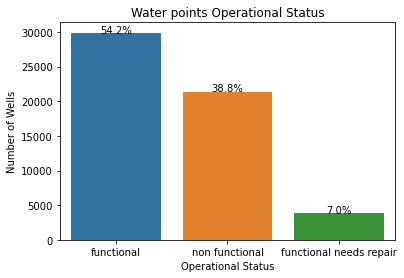

In [142]:
#visualizing the distribution of waterpoints based on status
#creating the seaborn count plot
ax = sns.countplot(x="status_group", data=data)

#calculating the total
total = len(data)

#adding percentage annotation on each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{percentage:.1f}%', ha='center')


#labeling the graph
plt.ylabel("Number of Water Points")
plt.xlabel("Operational Status")
plt.title("Water points Operational Status")
plt.show()

#saving the plot as jpeg
plt.savefig("./images.functionality_plot.jpeg", format="jpeg", dpi=300)

54.2% of the water points are functional, 38.8% are non functional while the remaininig 7% are functional but needs repair.

**Construction Year for Water Points**

<AxesSubplot:xlabel='construction_year', ylabel='Density'>

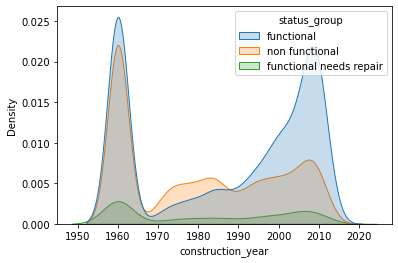

In [ ]:
#plotting the water points based on the construction year
sns.kdeplot(data=data, x="construction_year", hue="status_group", fill=True)

#axis and title labels

#

# **4. Modelling**

# **5. Evaluation**

# **6. Conclusion and Recommendation**
## **6.1 Conclusion**

## **6.2 Recommendations**